# Import the relevant libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Read in the dataset

In [26]:
gdp = pd.read_excel("GDP_Germany.xlsx")

## Change the format of the DataFrame

In [27]:
gdp = gdp.iloc[1].copy()

In [28]:
gdp = gdp.reset_index().copy()

In [29]:
gdp = gdp.rename(columns={"index": "year", 1: "GDP"}).copy()
gdp.drop(index=0, axis=1, inplace=True)
gdp = gdp.reset_index().copy()
gdp.drop(columns="index", axis=0, inplace=True)

## Plot the initial time series

Text(0, 0.5, 'GDP in Billion USD')

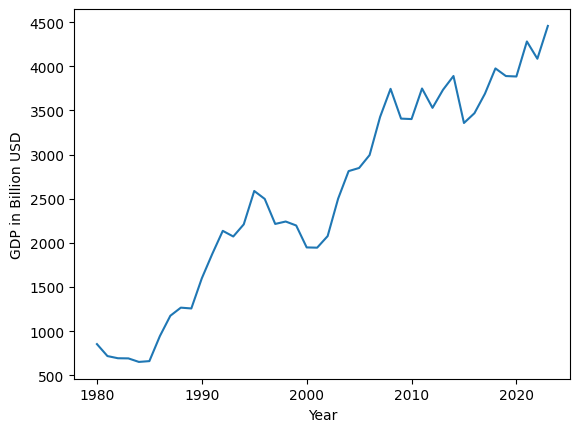

In [30]:
fig, ax = plt.subplots()
ax.plot("year", "GDP", data=gdp)
ax.set_xlabel("Year")
ax.set_ylabel("GDP in Billion USD")

# Time Series Analysis

### Is the time-series stationary?

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
# ADF-Test
result = adfuller(gdp["GDP"])
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])
for key, value in result[4].items():
    print("Critical values:")
    print(f"  {key} {value}")

ADF Statistic: -0.727565
p-value: 0.839480
Critical values:
  1% -3.6327426647230316
Critical values:
  5% -2.9485102040816327
Critical values:
  10% -2.6130173469387756


p-value = 0.84 > 0.05 -> the time-series is non-stationary

### Differencing the time-series to make it stationary

In [33]:
gdp_differenced_1 = gdp.copy()
gdp_differenced_1["GDP"] = gdp.GDP.diff(1).copy()

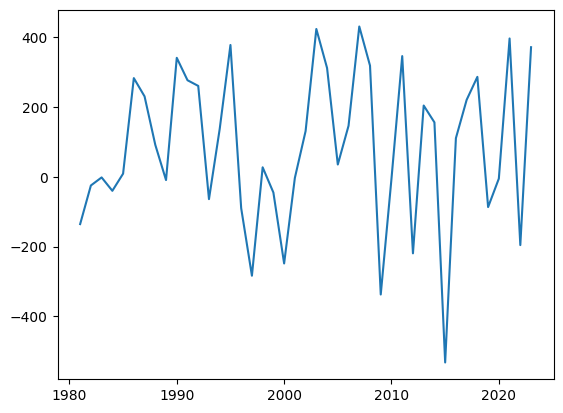

In [34]:
fig, ax = plt.subplots()
ax.plot("year", "GDP", data=gdp_differenced_1)

### Check again if time-series is now stationary with ADF

In [35]:
gdp_differenced_1.dropna(inplace=True)

# ADF-Test
result = adfuller(gdp_differenced_1["GDP"])
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])
for key, value in result[4].items():
    print("Critical values:")
    print(f"  {key} {value}")

# now, the data is stationary, since the p-value < 0.05

ADF Statistic: -4.043530
p-value: 0.001199
Critical values:
  1% -3.6327426647230316
Critical values:
  5% -2.9485102040816327
Critical values:
  10% -2.6130173469387756


## ARMA-Model will be used for further analysis

- time-series was non-stationary
- we only have one time-series

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

### First, the parameters p and q have to be determined

In [37]:
from statsmodels.tsa.stattools import acf, pacf

gdp["GDP"] = gdp["GDP"].astype(float).copy()

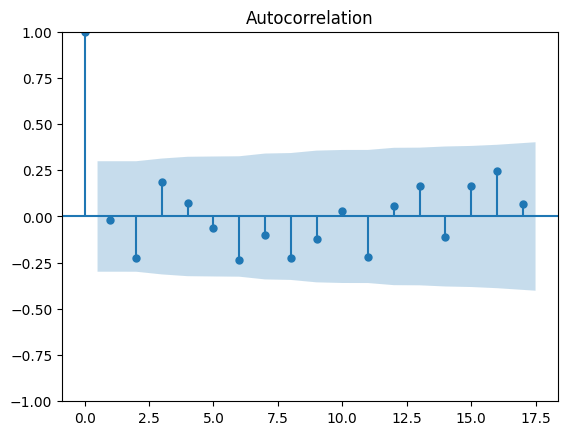

In [38]:
plot_acf(gdp_differenced_1["GDP"])
plt.show()

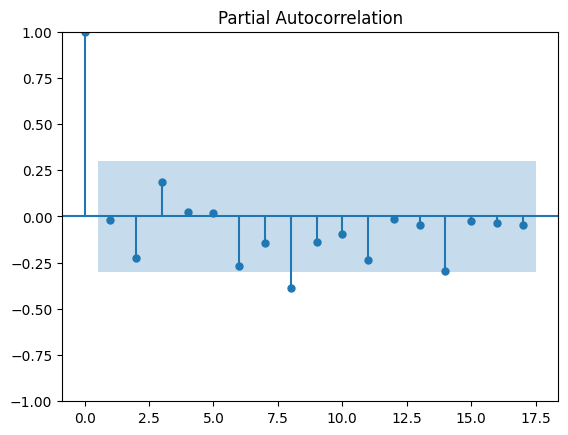

In [39]:
plot_pacf(gdp_differenced_1["GDP"])
plt.show()